# **Độ tương quan - Correlation**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('new_data.csv')
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH


In [4]:
header = df.columns.values.tolist()
print(header)

['cum', 'sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'phan_loai']


### **1. Khái niệm về độ tương quan dữ liệu:**

Độ tương quan là chỉ số thống kê đo lường mực độ mạnh yếu của mối quan hệ giữa hai biến số, trong đó:
-   Hệ số tương quan có giá trị từ -1.0 đến 1.0. Kết quả được tính lớn hơn 1.0 hoặc nhỏ hơn -1.0 có nghĩa là có lỗi trong phép đo tương quan.
-   Hệ số tương quan có giá trị âm cho thấy hai biến số có mối quan hệ nghịch biến hoặc tương quan âm
-   Hệ số tương quan có giá trị dương cho thấy hai biến số có mối quan hệ đồng biến hoặc tương quan dương
-   Tương quan bằng 0 cho thấy hai biến độc lập với nhau
Công thức tính độ tương quan Pearson:
$$ P_{xy}= \frac{Cov(x,y)}{σ_x σ_y} $$
Trong đó:
- Pxy: Hệ tương quan Pearson
- Cov(x,y): Hiệp phương sai của biến x và y
- σx: Độ lệch chuẩn của x
- σy: Độ lẹch chuẩn của y


### **2.1 Dữ liệu nhóm Khoa học tự nhiên**

In [5]:
data_khtn = df.loc[df['vat_li'].notnull() & df['hoa_hoc'].notnull() & df['sinh_hoc'].notnull(), ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li','hoa_hoc', 'sinh_hoc']]
khtn = data_khtn.corr()
data_khtn.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc
10,6.4,7.25,7.6,3.50,8.00,3.00
14,8.6,7.25,9.6,8.25,3.25,4.25
15,7.8,5.75,8.4,4.25,8.00,4.75
16,8.6,6.25,7.0,7.00,3.50,3.75
22,6.8,6.00,6.8,2.50,5.50,3.00


#### *Heatmap độ tương quan giữa các môn của Khoa học tự nhiên*

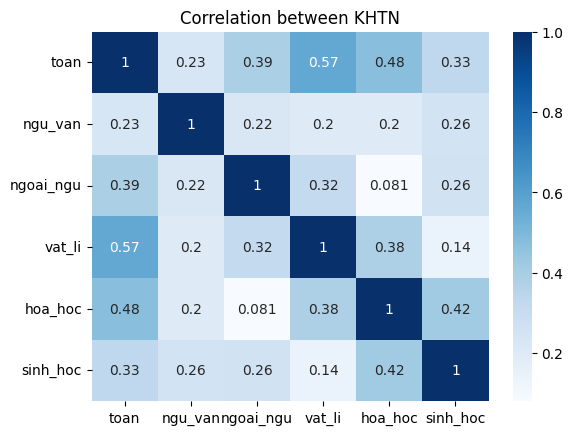

In [6]:
hm = sb.heatmap(data = khtn, annot = True, cmap = 'Blues')
plt.title('Correlation between KHTN')
plt.show()

#### *Nhận xét độ tương quan giứa các môn của Khoa học tự nhiên*
-   Độ tương quan cao: 0.57 (toan | vat_li)
    - Toán thuộc môn vận dụng tư duy phân tích, công thức để giải bài toán và Vật lí cũng thế, nên thường một học sinh giỏi toán sẽ giỏi cả vật lí hay nếu xét điểm toán tăng lên thì điểm vật lý cũng sẽ tăng.
    - Và việc xét đại học với tổ hợp của chúng thường là A00 (Toán, Lý, Hoá), A01 (Toán, Lý, Anh) nên độ tương quan giữa chúng rất cao
 
-   Độ tương quan thấp: 0.081 (hoa_hoc | ngoai_ngu): 
    - Hoá học, muốn học tốt môn này cần phải nhớ rất nhiều loại/nhóm chất: tên, đặc tính từng loại từng nhóm và các phản ứng với các loại/nhóm khác bao gồm màu sắc hiện tượng dẫn đên việc ghi nhớ và phân tích tập trung mất nhiều thời gian và thường các học sinh giỏi về môn này thường rơi vào khối Khoa học tư nhiên nên không có nhiều thời gian cho môn Ngoại ngữ vì môn Ngoại ngữ cũng tương như Hoá là môn cần giành nhiều thời gian. 
    - Và việc xét đại học với tổ hợp có môn Hoá học thường là A00 (Toán, Lý, Hoá) và B00 (Toán, Hoá, Sinh) (điều này thể hiện bởi độ tương quan của Hoá với Toán 0.48, Lý 0.38 và Sinh 0.42), viêc xét tổ hợp như D07 (Toán, Hoá, Anh) thường rất ít trường xét. nên độ tương quan giữa Hoá học và Ngoại ngữ là tương đối thấp và gần như không liên quan tới nhau.
-   Ở đây không có độ tương quan nghịch vì đây là dữ liệu điểm thi. 
    - Tất cả thí sinh đều mong muốn điểm của mình cao nhất có thể dù là môn nào đi nữa. Do đó, không có chuyện môn này thấp thì môn kia phải cao hay ngược lại.
    - Thí sinh có điểm môn A thấp và một môn B bất kì thấp thì cũng là bình thường. Điểm thấp hay cao là do sự cố gắng của thí sinh quyết định.

### **2.2 Dữ liệu nhóm Khoa học xã hội**

In [32]:
data_khxh = df.loc[df['dia_ly'].notnull() & df['lich_su'].notnull() & df['gdcd'].notnull(), ['toan', 'ngu_van', 'ngoai_ngu', 'dia_ly', 'lich_su', 'gdcd']]
khxh= data_khxh.corr()
data_khxh.head()

,toan,ngu_van,ngoai_ngu,dia_ly,lich_su,gdcd
0,3.6,5.00,4.0,6.0,2.75,8.75
1,8.4,6.75,7.6,7.5,8.50,8.25
2,5.8,7.50,5.0,5.5,7.25,8.75
3,7.4,7.50,8.6,6.5,7.50,7.50
4,7.2,8.50,9.0,8.5,8.00,8.25


#### *Heatmap độ tương quan giữa các môn của Khoa học xã hội*

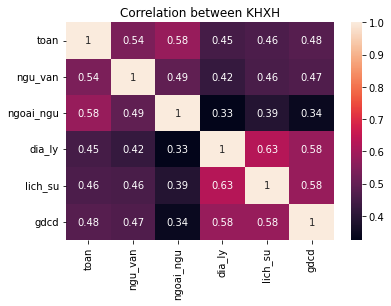

In [34]:
hm = sb.heatmap(data = khxh, annot = True)
plt.title('Correlation between KHXH')
plt.show()

#### *Nhận xét độ tương quan giữa các môn của Khoa học xã hội*
- Các chỉ số có ý nghĩa gần như tương tự với Khoa học tự nhiên
- Độ tương quan cao: 0.63 (dia_ly | lich_su): 
    - Địa lý và lịch sử là 2 môn xét đại học thuộc khoa học xã hội và cần có một trí nhớ tốt để ghi nhớ nên học sinh giỏi địa lý sẽ giỏi lịch sử.
    - Và việc xét đại học với tổ hợp của chúng thường là C00 (Văn, Sử, Địa), A07 (Toán, Sử, Địa) nên độ tương quan giữa chúng là rất cao
- Ở biểu đồ của nhóm Khoa học xã hội ta thấy gần như độ tương quan không chênh lệch nhiều
    - Do đa phần học sinh giỏi ở các môn này có khả năng ghi nhớ tốt nên điểm thành phần các sẽ môn tốt.
    - Và việc xét đại học với tổ hợp KHXH , Toán, Văn và Anh thường có nhiều tổ hợp và được nhiều trường xét chọn là A07 (Toán, Sử, Địa), C00 (Văn, Sử, Địa), C04(Văn, Toán, Địa), D01(Văn, Toán, Anh)....  


### **3. Kết luận**
-   Toán, Lí, Hoá có độ tương quan rất cao từ 0.38 đến 0.57 nên ta thấy một học sinh giỏi Toán thì sẽ giỏi Lý, Hoá. Ngược lại nếu môn Lí hoặc Hoá giỏi thì các môn còn lại sẽ giỏi
-   Toán, Ngữ văn có độ tương quan 0.54 và là 2 môn bắt buộc trong xét tốt nghiệp thpt nên hầu hết mọi học sinh đều chú tâm, nên ta thấy nếu xét điểm Toán tăng dần thì điểm Ngữ văn sẽ tăng dần và ngược lại.
-   Ngoại ngữ (cụ thể là Tiếng Anh), có độ tương quan cao với Toán 0.58, Văn 0.49, Lý 0.32 là trong các môn xét tốt nghiệp cũng như nằm trong các tổ hợp chính xét tuyển đại học như A01 (Toán, Lý, Anh), D01 (Toán, Văn, Anh)
-   Các cặp môn có độ tương quan cao nằm ở việc cách thức học tập giống nhau, hình thức: xét tốt nghiệp hoặc thuộc tổ hợp môn của chúng các trường đại học ưa xét tuyển. Và các cặp môn có độ tương quan thấp nằm ở cách thức học tập khác nhau, tổ hợp môn của chúng rất ít được các trường đại học xét tuyển 